In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')

## Lodestone Case study submission for Justin Huynh

In [3]:
directory = os.getcwd()
grill_type = pd.read_csv(directory + r'\SheetA.csv') # SheetA Contains details about propane vs charcoal grills
cost_satisfaction = pd.read_csv(directory + r'\SheetB.csv') # SheetB contains cost and satisfaction data
test_result = pd.read_csv(directory + r'\SheetC.csv') # SheetC Contains the blind taste test data

In [4]:
grill_type.head()

,grill_type,pre_heat_time,fuel_cost_per_meal,market_share,easiness_to_use,life_span_year,initial_investment
0,Charcoal,1200,2.00,0.44,-1,3,91
1,Propane,480,1.55,0.64,2,3,139


In [5]:
cost_satisfaction.head()

,item_material,device_id,grill_type,user_satisfaction,fuel_cost
0,Ground Beef Patty,1,Charcoal,-0.9,400.500
1,Ground Beef Patty,3,Charcoal,-1.3,399.600
2,Ground Beef Patty,5,Charcoal,-2.5,389.730
3,Ground Beef Patty,7,Charcoal,-1.7,402.399
4,Hotdog,1,Charcoal,-1.3,372.445


In [6]:
test_result.head()

,sample_item_index,item_material,is_frozen,grill_type,thumbs_up_score,guess_grill_correct
0,1,Veggie Patty,False,Propane,0.0,True
1,1,Hotdog,False,Propane,0.4,True
2,2,Veggie Patty,True,Propane,0.9,True
3,3,Veggie Patty,False,Propane,0.8,True
4,4,Veggie Patty,True,Propane,0.8,True


In [7]:
test_result.describe()

,sample_item_index,thumbs_up_score
count,720.000000,720.000000
mean,15.500000,2.034722
std,8.661458,2.398427
min,1.000000,0.000000
25%,8.000000,0.200000
50%,15.500000,0.550000
75%,23.000000,5.100000
max,30.000000,6.300000


# Q1 Which grill type is more fuel efficient based on sheet A?

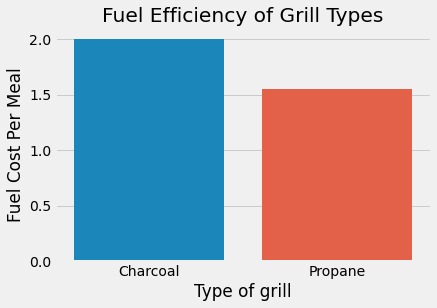

In [8]:
sns.barplot(x=grill_type['grill_type'], y=grill_type['fuel_cost_per_meal'])
plt.title('Fuel Efficiency of Grill Types')
plt.ylabel('Fuel Cost Per Meal')
plt.xlabel('Type of grill');

### Here we do a simple comparison between the fuel cost per meal as a way to determine fuel efficiency. Another metric that could be taken into account would be the amount of time to preheat the grill to the desired temperature. As the data provided does not necessarily give raw values for how much fuel is consumed and as such we cannot do a raw analysis on consumption of fuel.

# Q2 Which grill type has more market share?

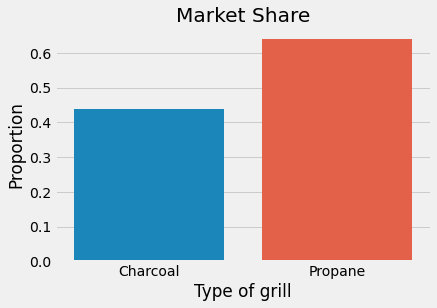

In [9]:
sns.barplot(x=grill_type['grill_type'], y=grill_type['market_share'])
plt.title('Market Share')
plt.ylabel('Proportion')
plt.xlabel('Type of grill');

### Propane grills take up more of the market share at 64% compared to Charcoal grills taking up 44% of market share. We note that there is an inconsitency here as the market share total exceeds 100%. 

# Q3 Based on cookoff data which grill type cost more fuel on a long run

In [10]:
cost_satisfaction.groupby('grill_type').agg(np.sum)

,device_id,user_satisfaction,fuel_cost
grill_type,,,
Charcoal,48,-17.8,4570.681
Propane,60,21.0,1897.300


In [11]:
cost_satisfaction.groupby('grill_type').agg(np.mean)

,device_id,user_satisfaction,fuel_cost
grill_type,,,
Charcoal,4,-1.483333,380.890083
Propane,5,1.750000,158.108333


In [12]:
# Splitting data frames into their respective types.
cs_charcoal = cost_satisfaction[cost_satisfaction['grill_type'] == 'Charcoal']
cs_propane = cost_satisfaction[cost_satisfaction['grill_type'] == 'Propane']

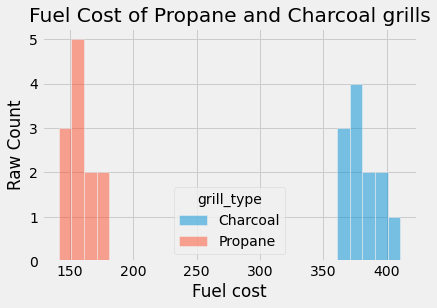

In [13]:
sns.histplot(cost_satisfaction, x='fuel_cost', hue='grill_type', binwidth=10)
plt.title('Fuel Cost of Propane and Charcoal grills')
plt.ylabel('Raw Count')
plt.xlabel('Fuel cost');

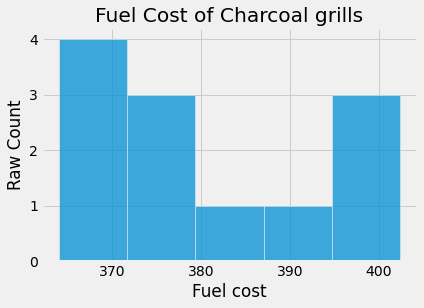

In [14]:
sns.histplot(cs_charcoal['fuel_cost'], label = 'Charcoal');
plt.title('Fuel Cost of Charcoal grills')
plt.ylabel('Raw Count')
plt.xlabel('Fuel cost');

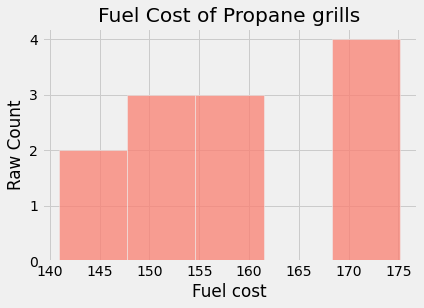

In [15]:
sns.histplot(cs_propane['fuel_cost'], label = 'Propane', color='salmon');
plt.title('Fuel Cost of Propane grills')
plt.ylabel('Raw Count')
plt.xlabel('Fuel cost');

### From the tables and histograms above, we can see there is a clear divide between the fuel efficiency of Propane and Charcoal grills. For both groups there appears to be some models or food types which tend toward the upper end of fuel cost. A reasonable assumption for the gap would be frozen foods if this table is correlated to the blind taste test table. Otherwise we can inspect the type of material grilled.

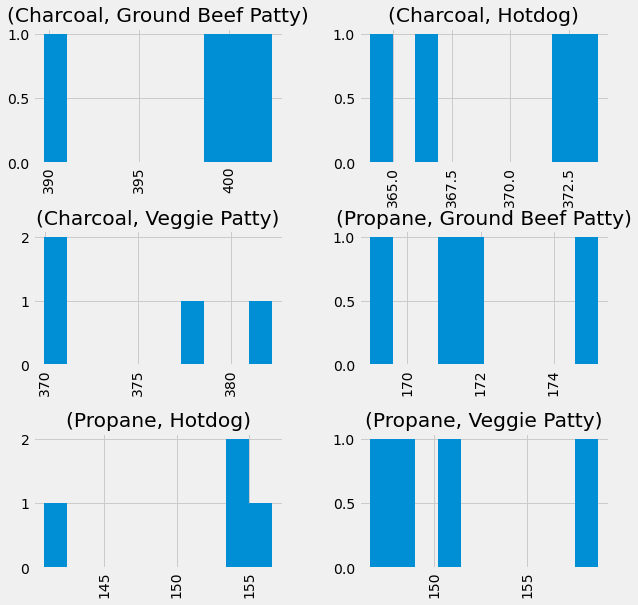

In [16]:
cost_satisfaction.hist('fuel_cost', by=['grill_type', 'item_material'], figsize=(10,10));

### Splitting by grill type and food item, we can see that values for certain food types correspond with the amount of fuel required to heat them. (The plots above are slightly misleading due to the x-axis, for speed this was done using pandas, but a more thorough approach could manually create histogram plots with appropriate scaling to portray a better visualization)

# Q4 Considering that the average American grill owner buys a new grill every three years, which grill type would cost more based on the fuel cost and initial investment?

### Initial thoughts: This is a bit hard to derive as the data provided did not come with well documented units. In sheet B fuel_cost is not very descriptive of how the fuel is used. Things to consider would be is the data extrapolated from a batch to average number of batches for some time period, are both figures of fuel cost and initial cost provided in singular dollars? As such, it will be assumed that the fuel cost for sheetB will be for a single year of grilling in dollars. Additionally these two factors alone do not account for the types of foods that people will be grilling. Another fact that is interesting is there is roughly a ~230 fuel cost gap between each food type.

In [17]:
# Combining relevant data from sheet a and b to form conclusions on total cost.
df1=cost_satisfaction.groupby('grill_type').agg(np.mean)
df2=grill_type[['grill_type', 'initial_investment']]
combine_cost = df2.join(df1, on='grill_type')
combine_cost['fuel_cost_3yr'] = combine_cost['fuel_cost'].multiply(3) # Assuming that fuel_cost is per year cost of operation
combine_cost

,grill_type,initial_investment,device_id,user_satisfaction,fuel_cost,fuel_cost_3yr
0,Charcoal,91,4,-1.483333,380.890083,1142.67025
1,Propane,139,5,1.750000,158.108333,474.32500


In [18]:
combine_cost['3_yr_total'] = combine_cost['fuel_cost'] + combine_cost['initial_investment']
combine_cost['3_yr_total_assumption'] = combine_cost['fuel_cost_3yr'] + combine_cost['initial_investment']

In [19]:
combine_cost.head()

,grill_type,initial_investment,device_id,user_satisfaction,fuel_cost,fuel_cost_3yr,3_yr_total,3_yr_total_assumption
0,Charcoal,91,4,-1.483333,380.890083,1142.67025,471.890083,1233.67025
1,Propane,139,5,1.750000,158.108333,474.32500,297.108333,613.32500


### Not much can be said about this beyond, buy according to your use case if cost is the primary factor. Charcoal is much cheaper if you are not grilling as much stuff as the cost for fuel is much higher than propane. Large amounts of grilling would be done cheaper over 3 years on a propane grill. 

# Q5 Which grill type is easier to use based on the user satisfaction score? Based on data, which grill is preferred? What factors might play a role?

In [20]:
cost_satisfaction[['grill_type', 'user_satisfaction']].groupby('grill_type').agg(np.mean)

,user_satisfaction
grill_type,
Charcoal,-1.483333
Propane,1.750000


In [21]:
np.mean(cost_satisfaction['user_satisfaction'])

0.1333333333333333

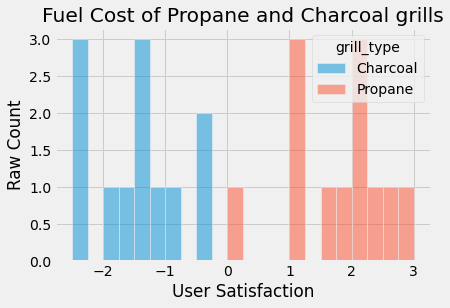

In [22]:
sns.histplot(cost_satisfaction, x='user_satisfaction', hue='grill_type', binwidth=.25, )
plt.title('Fuel Cost of Propane and Charcoal grills')
plt.ylabel('Raw Count')
plt.xlabel('User Satisfaction');

### We have an interesting result as there is a clear divide between positive and negative scores. Charcoal has below 0 for all of its ratings while propane has above 0. These satisfcation scores could potentially have been normalized, leading to the near 0 mean.

### As such the clear winner is Propane with an average satisfaction rating of 1.75. Potential factors that play into this could be setting up the charcoal vs gas grill (lighting and maintaining the fire and briquettes versus plug and play propane tanks). Additionally, it is much easier to control heat on a propane grilled compared to a charcoal grill. From SheetA we can also see that charcoal grills have a much longer preheat time. More time waiting is less time having fun.

# Q6 Are your recommendations to the manufacturer different to recommendations you’d make to the user?

In [23]:
# Quick check to see if our data is well formed (equality)
test_result.groupby(['item_material', 'grill_type','is_frozen']).count()

sample_item_index  thumbs_up_score  \
item_material     grill_type is_frozen                                       
Ground Beef Patty Charcoal   False                     60               60   
                             True                      60               60   
                  Propane    False                     60               60   
                             True                      60               60   
Hotdog            Charcoal   False                     60               60   
                             True                      60               60   
                  Propane    False                     60               60   
                             True                      60               60   
Veggie Patty      Charcoal   False                     60               60   
                             True                      60               60   
                  Propane    False                     60               60   
                             True                      60               60   

                                        guess_grill_correct  
item_material     grill_type is_frozen                       
Ground Beef Patty Charcoal   False                       60  
                             True                        60  
                  Propane    False                       60  
                             True                        60  
Hotdog            Charcoal   False                       60  
                             True                        60  
                  Propane    False                       60  
                             True                        60  
Veggie Patty      Charcoal   False                       60  
                             True                        60  
                  Propane    False                       60  
                             True                        60

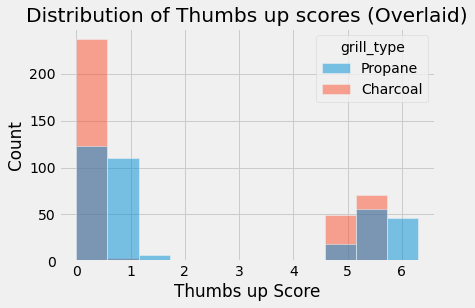

In [24]:
sns.histplot(test_result, x='thumbs_up_score', hue='grill_type')
plt.title('Distribution of Thumbs up scores (Overlaid)')
plt.xlabel('Thumbs up Score');

### Quite interesting to see that Propane avoided the dreaded sub 0.5 scores while charcoal was much more divergent.

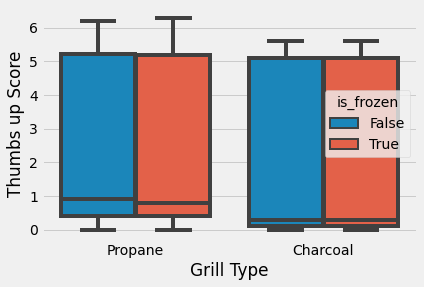

In [25]:
sns.boxplot(data= test_result, x='grill_type', y='thumbs_up_score', hue='is_frozen')
plt.ylabel('Thumbs up Score')
plt.xlabel('Grill Type');

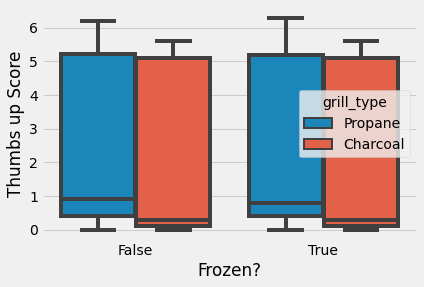

In [26]:
sns.boxplot(data= test_result, x='is_frozen', y='thumbs_up_score', hue='grill_type');
plt.ylabel('Thumbs up Score')
plt.xlabel('Frozen?');

### From the two boxplots it is noted that the frozen status of the item had little impact on the thumbs score when comparing within the same grill type. In the second plot propane's mean remains roughly one point above charcoals regardless of the status of frozen food. Context to consider would be the sampling and data collection methods.

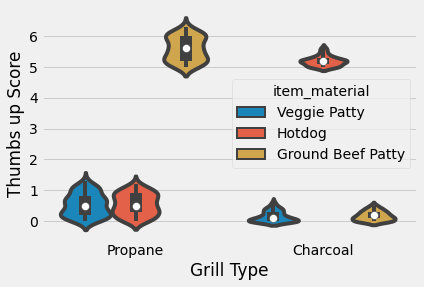

In [27]:
sns.violinplot(data= test_result, x='grill_type', y='thumbs_up_score', hue='item_material')
plt.ylabel('Thumbs up Score')
plt.xlabel('Grill Type');

### Looking at the violin plots distinguishing between food types, a massive difference is found for scoring. Ground beef patties performed significantly better on propane grills while hotdogs performed significantly better on charcoal grills. Propane grills had slightly better results for other food types but nothing as outstanding as noted before.

### Another layer of analysis that could be done would be to look at the guesses data. Although, I would not consider this to be very significant due to inherent biases people may have towards how they would like their food cooked. Assuming participants were informed that things were either grilled in charcoal or propane, this would affect responses. Instead if participants were not informed of any sort of cooking methods and just were told "try this" and were later asked about which type of grill was used would allow use of the guesses column data to mitigate biases or separate people who have tastebuds from those who do not.

### Recommendations to businesses would be to play to these strengths for marketing. Consumers should also follow suit for purchases. Manufacturer specifics would be to probe into research for making charcoal grills more fuel efficient and easier to use.

# Closing Notes

### Primarily, there are concerns about the data collection process and how it affects the derived data. One particular example would be comparing charcoal to propane consumption. Was a certain amount of charcoal used for each batch of cooking to determine fuel cost? Inconsitency of human efforts could potentially skew charcoal data (A person really likes adding much more charcoal than needed vs a frugal person adding the bare minimum). As addressed previously another concern is bias in taste and bias in how things should be cooked. Logistical concerns are about the values provided in table as it is hard to descern their true value without context. having background info on the scale of values or particular unit value would make analysis easier.